In [15]:
import json
import matplotlib.pyplot as plt
import glob
import numpy as np
import subtitleprocessing


import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

# set up figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams.update({'font.size': 22})


<IPython.core.display.Javascript object>

In [16]:
ref_data_dir = '/Users/lantonel/SilverTongue/training_dataset/'
reference_srts = [file for file in glob.glob(ref_data_dir + '*.srt')]
#print reference_srts
reference_txts = []
for srt in reference_srts:
    subs = subtitleprocessing.srt_to_sub(srt)
    txt = subtitleprocessing.sub_to_txt(srt, subs)
    reference_txts.append(txt)
#print reference_txts

In [17]:
user_data_dir = '/Users/lantonel/SilverTongue/fellow_dataset/'
user_urls = ['YckvYUlESxs', # denis week 2 demo
             'evewg5TAdfc', # jamie week 2 demo
             'J7DyWcA5U48', # jamie week 1 demo
             'ZCGEMI3Saug', # patrick week 2 demo
             'U4rGFXM0Z4I', # sean week 2 demo
             'U3T2eI_5VOE', # wes week 2 demo
            ]
user_labels = ['Denis 2',
               'Jamie 2',
               'Jamie 1',
               'Patrick 2',
               'Sean 2',
               'Wes 2',             
              ]
user_srts = [user_data_dir+user_url+'.en.srt' for user_url in user_urls]
user_txts = [user_data_dir+user_url+'.en.txt' for user_url in user_urls]

#print user_txts

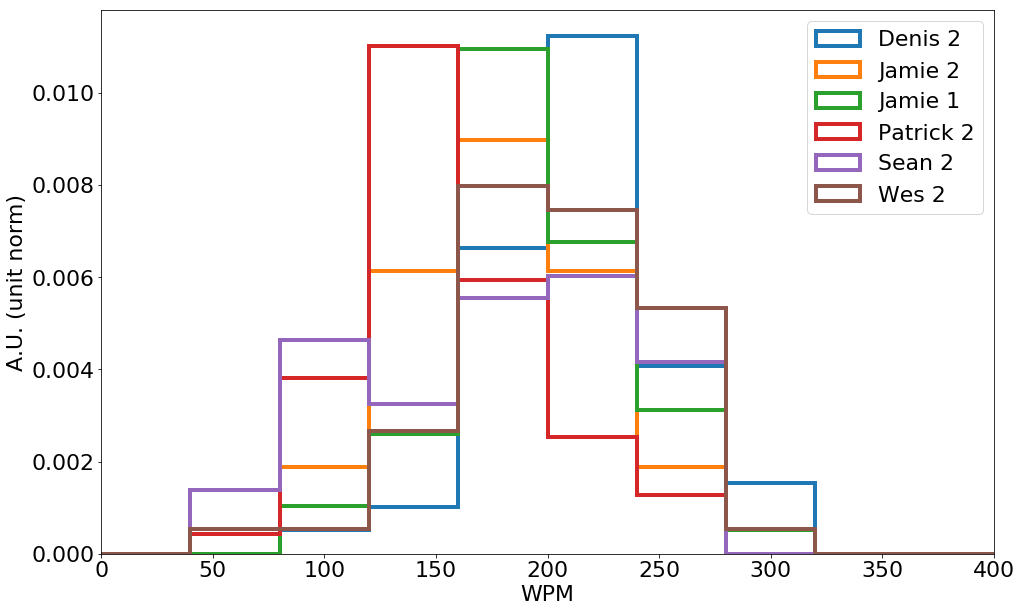

In [18]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
wpm_max = 400
# let's average over ~5 second intervals, that should reduce the high WPM tail
for i, ref in enumerate(user_srts):
    subs = subtitleprocessing.srt_to_sub(ref)
    wpms = []
    start_time = subs[0].start
    n_words = 0
    for sub in subs:
        n_words += len(sub.content.split())
        time = (sub.end - start_time).total_seconds()
        if time > 5:
            wpm = n_words/time*60
            wpms.append(wpm)
            n_words = 0
            start_time = sub.end

    plot = plt.hist(wpms, 
                10, 
                range=[0, wpm_max], 
                histtype='step',
                stacked=False,
                alpha=1,
                normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                linewidth=4,
                label=user_labels[i]
               )

leg = plt.legend(loc=1)
axes = plt.gca()
axes.set_xlabel("WPM")
axes.set_ylabel("A.U. (unit norm)")
axes.set_xlim(0,wpm_max)
plt.show()

213.076068905
177.031618052
192.837867597
156.904463826
176.696052982
202.904747148


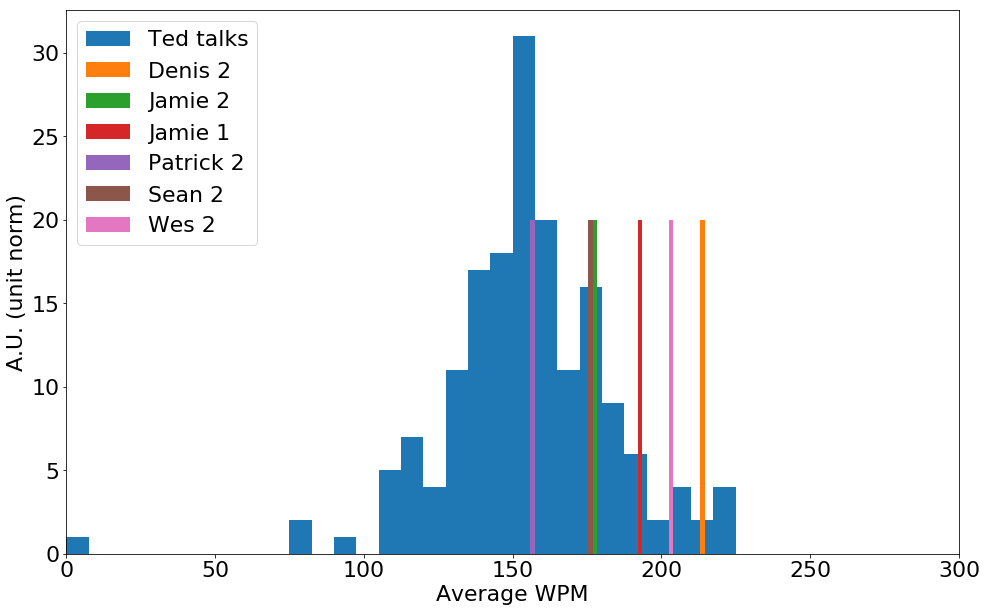

In [19]:
means = []
wpm_max = 300

# make distributions of average WPM
for i, ref in enumerate(reference_srts):
    subs = subtitleprocessing.srt_to_sub(ref)
    wpms = []
    start_time = subs[0].start
    n_words = 0
    for sub in subs:
        n_words += len(sub.content.split())
        time = (sub.end - start_time).total_seconds()
        if time > 5:
            wpm = n_words/time*60
            wpms.append(wpm)
            n_words = 0
            start_time = sub.end

    mean = np.mean(wpms)
    means.append(mean)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plot = plt.hist(means, 
                40, 
                range=[0, wpm_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label='Ted talks'
               )


for i, ref in enumerate(user_srts):
    subs = subtitleprocessing.srt_to_sub(ref)
    wpms = []
    start_time = subs[0].start
    n_words = 0
    for sub in subs:
        n_words += len(sub.content.split())
        time = (sub.end - start_time).total_seconds()
        if time > 5:
            wpm = n_words/time*60
            wpms.append(wpm)
            n_words = 0
            start_time = sub.end
    mean = np.mean(wpms)
    print mean
    plot = plt.hist([mean], 
                200, 
                range=[0, wpm_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                weights = [20],
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label=user_labels[i]
               )

leg = plt.legend(loc=2)
axes = plt.gca()
axes.set_xlabel("Average WPM")
axes.set_ylabel("A.U. (unit norm)")
axes.set_xlim(0,wpm_max)
plt.show()

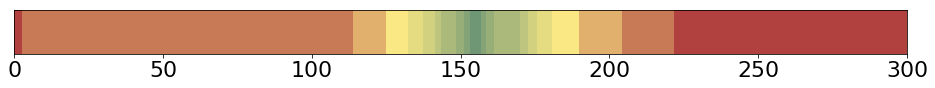

In [34]:
colors = ['#B0413E','#C87955','#E1B06D','#F9E884','#E5DC82','#D2D180','#BEC57E','#ABBA7B','#97AE79','#84A377','#709775']

colors.extend(list(reversed(colors)))
center = np.percentile(means, 50)
bin_percentiles = [(100./(len(colors)-2))*i for i in range(len(colors)-1)]

bin_edges = [np.percentile(means, i) for i in bin_percentiles]
widths = [bin_edges[0]]
for i in range(1,len(bin_edges)):
    widths.append(bin_edges[i]-bin_edges[i-1])
widths.append(wpm_max-bin_edges[-1])
weights = [[width] for width in widths]
data = [[1] for width in widths]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 0.8
plt.rcParams["figure.figsize"] = fig_size

plt.hist(data, weights = weights, bins=1, color = colors, orientation="horizontal", stacked=True)
ax = plt.gca()
ax.set_xlim(0,wpm_max)
ax.set_ylim(0.8,1.2)
ax.get_yaxis().set_visible(False)
#ax.get_xaxis().set_visible(False)
plt.show()

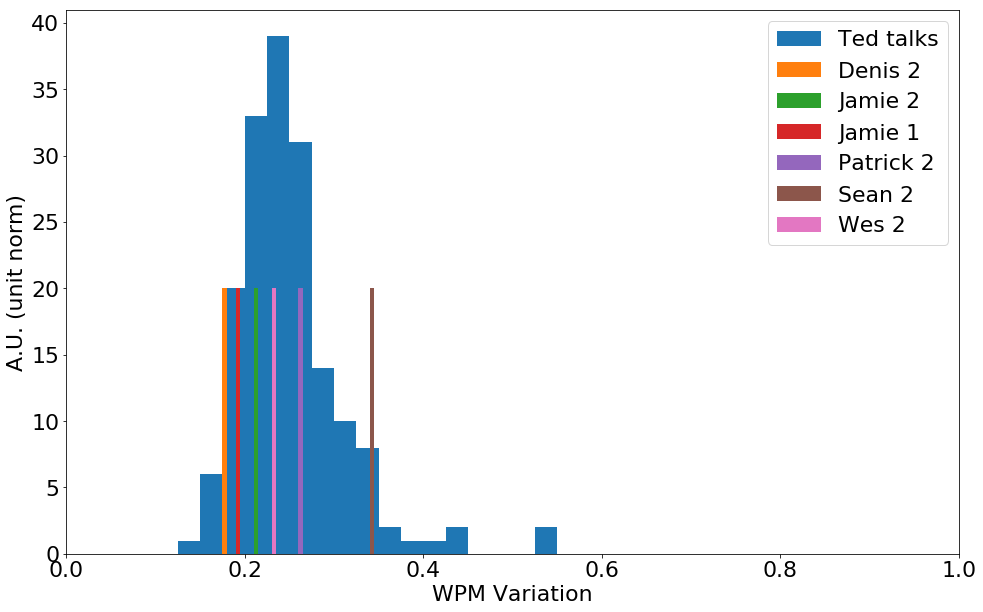

In [35]:
variations = []
variation_max = 1

# make distributions of average WPM
for i, ref in enumerate(reference_srts):
    subs = subtitleprocessing.srt_to_sub(ref)
    wpms = []
    start_time = subs[0].start
    n_words = 0
    for sub in subs:
        n_words += len(sub.content.split())
        time = (sub.end - start_time).total_seconds()
        if time > 5:
            wpm = n_words/time*60
            wpms.append(wpm)
            n_words = 0
            start_time = sub.end
    rms = np.std(wpms)
    mean = np.mean(wpms)
    variations.append(rms/mean)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plot = plt.hist(variations, 
                40, 
                range=[0, variation_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label='Ted talks'
               )


for i, ref in enumerate(user_srts):
    subs = subtitleprocessing.srt_to_sub(ref)
    wpms = []
    start_time = subs[0].start
    n_words = 0
    for sub in subs:
        n_words += len(sub.content.split())
        time = (sub.end - start_time).total_seconds()
        if time > 5:
            wpm = n_words/time*60
            wpms.append(wpm)
            n_words = 0
            start_time = sub.end
    rms = np.std(wpms)
    mean = np.mean(wpms)
    variation = rms/mean

    plot = plt.hist([variation], 
                200, 
                range=[0, variation_max], 
                histtype='stepfilled',
                stacked=False,
                alpha=1,
                weights = [20],
                #normed=True,
                #color = thing['color'],
                #edgecolor = thing['color'],
                #linestyle = thing['linestyle'],
                #linewidth=thing['linewidth'],
                label=user_labels[i]
               )

leg = plt.legend(loc=1)
axes = plt.gca()
axes.set_xlabel("WPM Variation")
axes.set_ylabel("A.U. (unit norm)")
axes.set_xlim(0,variation_max)
plt.show()

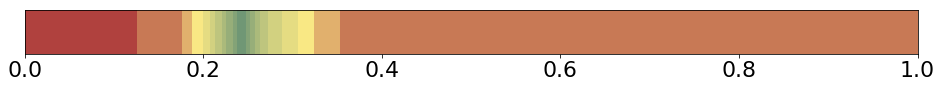

In [37]:
colors = ['#B0413E','#C87955','#E1B06D','#F9E884','#E5DC82','#D2D180','#BEC57E','#ABBA7B','#97AE79','#84A377','#709775']

colors.extend(list(reversed(colors)))
center = np.percentile(variations, 50)
bin_percentiles = [(100./(len(colors)-2))*i for i in range(len(colors)-1)]
bin_edges = [np.percentile(variations, i) for i in bin_percentiles]
widths = [bin_edges[0]]
for i in range(1,len(bin_edges)):
    widths.append(bin_edges[i]-bin_edges[i-1])
widths.append(variation_max-bin_edges[-1])
weights = [[width] for width in widths]
data = [[1] for width in widths]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 0.8
plt.rcParams["figure.figsize"] = fig_size

plt.hist(data, weights = weights, bins=1, color = colors, orientation="horizontal", stacked=True)
ax = plt.gca()
ax.set_xlim(0,variation_max)
ax.set_ylim(0.8,1.2)
ax.get_yaxis().set_visible(False)
#ax.get_xaxis().set_visible(False)
plt.show()